In [123]:
import pandas as pd

# URLs directas de los archivos en GitHub
url_2004 = "https://github.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/raw/refs/heads/main/TP3/Individual_t104.dta"
url_2024 = "https://github.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/raw/refs/heads/main/TP3/usu_individual_T124.xlsx"

# Leer los archivos directamente desde GitHub
data_2004 = pd.read_stata(url_2004)
data_2024 = pd.read_excel(url_2024)

print(data_2004.head())
print(data_2024.head())


     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1       

In [124]:
import pandas as pd

# Diccionario de mapeo para homologar las columnas
# Formato: {'nombre_actual_en_2004': 'nombre_actual_en_2024'}
column_mapping = {
    'ano4': 'ANO4',
    'nro_hogar': 'NRO_HOGAR',
    'componente': 'COMPONENTE',
    'h15': 'H15',
    'ch04': 'CH04',
    'region': 'REGION',
    'mas_500': 'MAS_500',
    'aglomerado': 'AGLOMERADO',
    'pondera': 'PONDERA',
    'ch03': 'CH03',
    'ch04': 'CH04',
    'ch06': 'CH06',
    'ch07': 'CH07',
    'ch08': 'CH08',
    'nivel_ed': 'NIVEL_ED',
    'estado': 'ESTADO',
    'cat_ocup': 'CAT_OCUP',
    'cat_inac': 'CAT_INAC',
    'ipcf': 'IPCF'
    # Agrega más columnas según sea necesario
}


# Renombrar las columnas de la base 2004 usando el diccionario
data_2004_renamed = data_2004.rename(columns=column_mapping)

# Verificar si las columnas coinciden
print("Columnas en 2004 después del mapeo:", data_2004_renamed.columns)
print("Columnas en 2024:", data_2024.columns)

# Concatenar las bases de datos
data_combined = pd.concat([data_2004_renamed, data_2024], ignore_index=True)

# Verificar las dimensiones y una muestra de los datos combinados
print("Dimensiones de la base combinada:", data_combined.shape)
print(data_combined.head())


# Diccionario de mapeo: nombres a códigos
aglomerado_mapping = {
    "Gran La Plata": 2,
    "Bahía Blanca - Cerri": 3,
    "Gran Rosario": 4,
    "Gran Santa Fe": 5,
    "Gran Paraná": 6,
    "Posadas": 7,
    "Gran Resistencia": 8,
    "Cdro. Rivadavia – Rada Tilly": 9,
    "Gran Mendoza": 10,
    "Corrientes": 12,
    "Gran Córdoba": 13,
    "Concordia": 14,
    "Formosa": 15,
    "Neuquén – Plottier": 17,
    "S.del Estero - La Banda": 18,
    "Jujuy - Palpalá": 19,
    "Río Gallegos": 20,
    "Gran Catamarca": 22,
    "Salta": 23,
    "La Rioja": 25,
    "San Luis - El Chorrillo": 26,
    "Gran San Juan": 27,
    "Gran Tucumán - T. Viejo": 29,
    "Santa Rosa - Toay": 30,
    "Ushuaia - Río Grande": 31,
    "Ciudad de Buenos Aires": 32,
    "Partidos del GBA": 33,
    "Mar del Plata - Batán": 34,
    "Río Cuarto": 36
}

# Reemplazar nombres por códigos en la columna 'AGLOMERADO'
data_combined['AGLOMERADO'] = data_combined['AGLOMERADO'].replace(aglomerado_mapping)

# Asegurarse de que todos los valores sean numéricos
data_combined['AGLOMERADO'] = pd.to_numeric(data_combined['AGLOMERADO'], errors='coerce')

# Verificar los valores únicos después de la transformación
print("Valores únicos en AGLOMERADO después de la homologación:")
print(data_combined['AGLOMERADO'].unique())




Columnas en 2004 después del mapeo: Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'trimestre',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)
Columnas en 2024: Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)
Dimensiones de la base combinada: (91339, 334)
     CODUSU  NRO_HOGAR COMPONENTE H15    ANO4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre 

In [125]:
# Usar .unique() para obtener valores únicos
if 'AGLOMERADO' in data_combined.columns:
    distinct_aglomerados = data_combined['AGLOMERADO'].unique()
    print("Valores únicos en AGLOMERADO:")
    print(distinct_aglomerados)
else:
    print("La columna 'AGLOMERADO' no existe en el DataFrame.")



Valores únicos en AGLOMERADO:
[32. 33. nan 19. 22. 23. 25.  7.  8. 12. 15. 10. 26. 27.  2.  3.  4.  5.
  6. 13. 14. 30. 34. 36. 20. 31. 18. 29. 93. 91.  9. 17. 38.]


In [126]:
# Agrupar por AGLOMERADO y ano04, y contar las filas
resultado = data_combined.groupby(['AGLOMERADO', 'ANO4']).size().reset_index(name='count')

# Mostrar el resultado
print(resultado)


    AGLOMERADO    ANO4  count
0          2.0  2004.0   1730
1          2.0  2024.0   1040
2          3.0  2004.0   1156
3          3.0  2024.0   1008
4          4.0  2004.0   2465
5          4.0  2024.0   1679
6          5.0  2004.0   1421
7          5.0  2024.0   1332
8          6.0  2004.0   1166
9          6.0  2024.0   1401
10         7.0  2004.0   1453
11         7.0  2024.0   1193
12         8.0  2004.0   1575
13         8.0  2024.0   1339
14         9.0  2024.0    871
15        10.0  2004.0   2357
16        10.0  2024.0   1849
17        12.0  2004.0   1337
18        12.0  2024.0   1038
19        13.0  2004.0   2792
20        13.0  2024.0   2169
21        14.0  2004.0    966
22        14.0  2024.0   1373
23        15.0  2004.0    978
24        15.0  2024.0   1280
25        17.0  2024.0   1160
26        18.0  2024.0   1356
27        19.0  2004.0   1315
28        19.0  2024.0   1464
29        20.0  2004.0    844
30        20.0  2024.0    635
31        22.0  2004.0   1005
32        

In [138]:
# Usar .unique() para obtener valores únicos (similar a SELECT DISTINCT)
if 'ANO4' in data_combined.columns:
    distinct_anos = data_combined['ANO4'].unique()
    print("Valores únicos en ANO4:")
    print(distinct_anos)
elif 'ano4' in data_combined.columns:
    distinct_anos = data_combined['ano4'].unique()
    print("Valores únicos en ano4:")
    print(distinct_anos)
else:
    print("La columna 'ANO4' o 'ano4' no existe en el DataFrame.")


Valores únicos en ANO4:
[2004. 2024.]


In [139]:
# Filtrar para considerar solo los aglomerados 32 y 33
# Eliminar valores nulos y no numéricos en AGLOMERADO
resultado_limpio = data_combined[pd.to_numeric(data_combined['AGLOMERADO'], errors='coerce').notnull()]



data_combined['AGLOMERADO'] = resultado_limpio['AGLOMERADO'].astype(int)
resultado_filtrado = resultado_limpio[data_combined['AGLOMERADO'].isin([32, 33])]




<ipython-input-139-474bf5162a55>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  resultado_filtrado = resultado_limpio[data_combined['AGLOMERADO'].isin([32, 33])]


In [140]:
# Convertir IPCF y CH06 a numéricos
data_combined['IPCF'] = pd.to_numeric(data_combined['IPCF'], errors='coerce')
data_combined['CH06'] = pd.to_numeric(data_combined['CH06'], errors='coerce')
data_combined = data_combined.dropna(subset=['IPCF', 'CH06'])


# Filtrar observaciones con ingresos y edades no válidas
data_combined_clean = resultado_filtrado[
    (data_combined['IPCF'] >= 0) &  # Ingresos no negativos
    (data_combined['CH06'] >= 0) &  # Edades no negativas
    (data_combined['CH06'] <= 120)  # Edades razonables
]

# Verificar dimensiones antes y después de la limpieza
print(f"Dimensiones antes de la limpieza: {resultado_filtrado.shape}")
print(f"Dimensiones después de la limpieza: {resultado_filtrado.shape}")



Dimensiones antes de la limpieza: (14563, 334)
Dimensiones después de la limpieza: (14563, 334)


<ipython-input-140-6a17102e4484>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_combined_clean = resultado_filtrado[


In [143]:
# Crear un diccionario de mapeo para convertir los valores
sexo_mapping = {
    1: 'Varón',
    2: 'Mujer',
    'Varón': 'Varón',
    'Mujer': 'Mujer'
}

# Mapear los valores de CH04
data_combined_clean['CH04'] = data_combined_clean['CH04'].replace(sexo_mapping)

# Verificar los valores únicos después de la homologación
print("Valores únicos en CH04 después de la homologación:")
print(data_combined_clean['CH04'].unique())


Valores únicos en CH04 después de la homologación:
['Varón' 'Mujer']


<ipython-input-143-986f45f8c9e0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combined_clean['CH04'] = data_combined_clean['CH04'].replace(sexo_mapping)


Valores únicos en 'ANO4': [2004. 2024.]


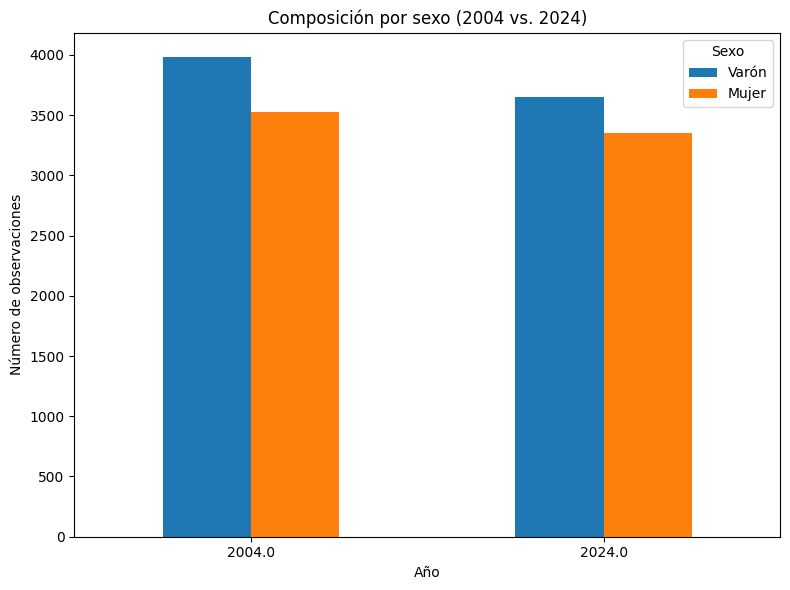

In [144]:
#gráfico por año y sexo

import matplotlib.pyplot as plt

print("Valores únicos en 'ANO4':", data_combined_clean['ANO4'].unique())

# Crear una nueva columna 'AÑO' basada en 'ano04' o 'ANO04'
# Crear la columna 'AÑO' combinando 'ano04' y 'ANO04'
# Verificar valores únicos en la columna 'AÑO'


# Agrupar por año y sexo
sexo_composicion = data_combined_clean.groupby(['ANO4', 'CH04']).size().unstack()

# Renombrar los valores de CH04 (1: Varón, 2: Mujer)
sexo_composicion.columns = ['Varón', 'Mujer']

# Gráfico de barras
sexo_composicion.plot(kind='bar', figsize=(8, 6))
plt.title("Composición por sexo (2004 vs. 2024)")
plt.ylabel("Número de observaciones")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


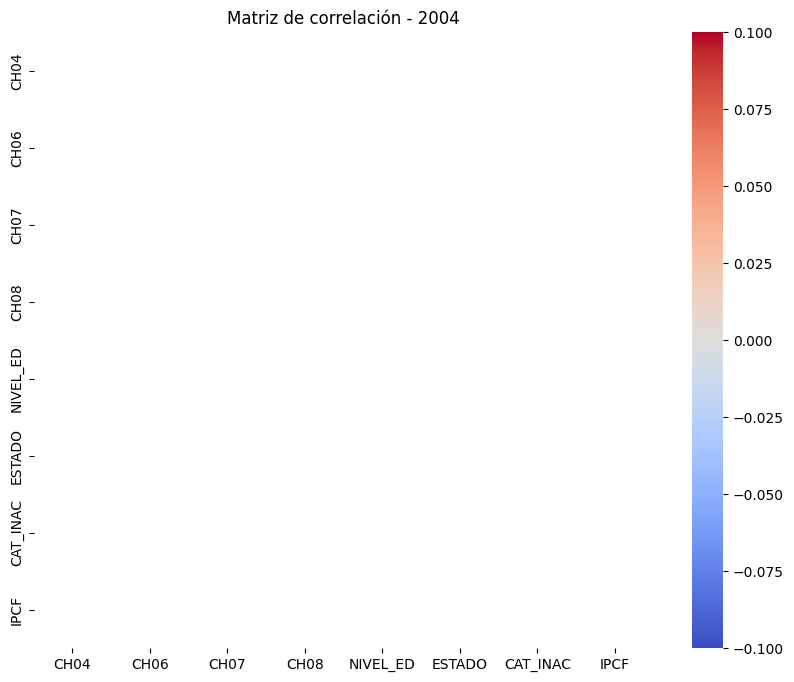

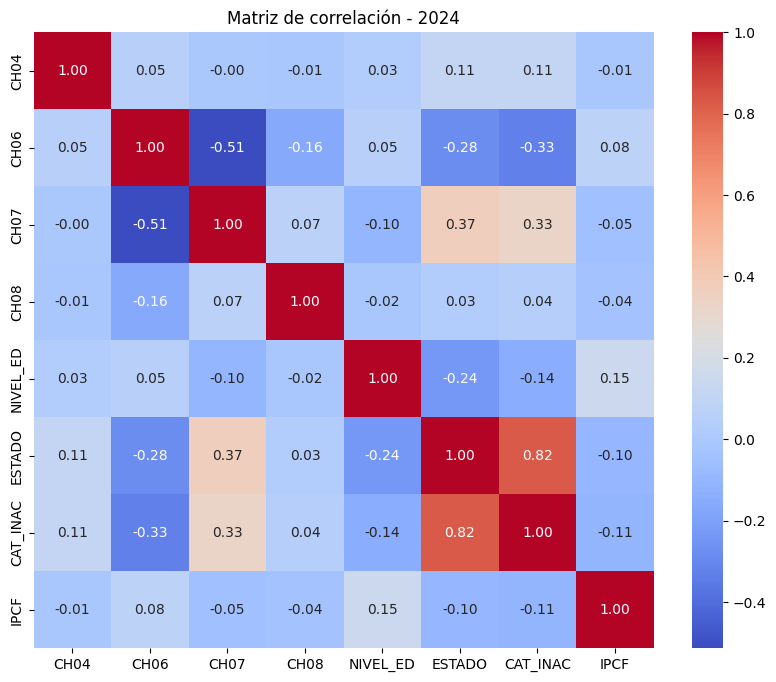

In [43]:
#Matriz de correlación


import seaborn as sns

# Filtrar las variables seleccionadas para 2004 y 2024
vars_corr = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
data_2004_corr = data_combined_clean[data_combined_clean['ANO4'] == 2004][vars_corr]
data_2024_corr = data_combined_clean[data_combined_clean['ANO4'] == 2024][vars_corr]

# Matrices de correlación
corr_2004 = data_2004_corr.corr()
corr_2024 = data_2024_corr.corr()

# Gráficos de las matrices
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2004, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación - 2004")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_2024, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación - 2024")
plt.show()


In [45]:
# Conteos por condición de actividad
ocupados = data_combined_clean[data_combined_clean['ESTADO'] == 1].shape[0]
desocupados = data_combined_clean[data_combined_clean['ESTADO'] == 2].shape[0]
inactivos = data_combined_clean[data_combined_clean['ESTADO'] == 3].shape[0]

print(f"Desocupados: {desocupados}")
print(f"Inactivos: {inactivos}")

# Media de IPCF por estado
ipcf_mean_by_state = data_combined_clean.groupby('ESTADO')['IPCF'].mean()
print("Media de IPCF por estado:")
print(ipcf_mean_by_state)


Desocupados: 311
Inactivos: 2662
Media de IPCF por estado:
ESTADO
0.0         0.000000
1.0    207644.844045
2.0     85019.145466
3.0    130704.601499
4.0    104745.950079
Name: IPCF, dtype: float64
